In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def graph_gradients(file):
    
    img = cv.imread(file)
    
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # suavizamos la imagen
    blurimg = cv.GaussianBlur(gray,(5,5),0)

    # calculo laplaciano con un kernel de tamaño 3
    lap = cv.Laplacian(blurimg,cv.CV_64F,ksize=3) 

    # calculo el gradiente en la dirección x
    sobelx= cv.Sobel(blurimg, cv.CV_64F, dx=1, dy=0)

    # calculo el gradiente en la dirección y
    sobely= cv.Sobel(blurimg, cv.CV_64F, dx=0, dy=1)
    
    # magnitud de los gadientres
    mag = np.hypot(sobelx, sobely)
    # soluciono overflow
    mag = mag/mag.max()*255 
    
    # dirección de los gradientes
    theta = np.arctan2(sobely, sobelx)
    angle = np.rad2deg(theta)

    # convierto todos los resultados a uint8
    lap = np.uint8(np.absolute(lap))
    sobelx= np.uint8(np.absolute(sobelx))
    sobely = np.uint8(np.absolute(sobely))
    mag = np.uint8(mag)
    
    # coloreamos los gradientes
    red = np.array([255, 0, 0])
    cyan = np.array([0, 255, 255])
    green = np.array([0, 255, 0])
    yellow = np.array([255, 255, 0])
    
    M, N = mag.shape
    image_map = np.zeros((M, N, 3), dtype= np.uint16)
    
    
    for i in range(0, M):
        for j in range(0, N):
            if angle[i][j] < 90.0:
                image_map[i, j, :] = red
            elif angle[i][j] >= 90.0 and angle[i][j] < 180.0:
                image_map[i, j, :] = cyan
            elif angle[i][j] >= 180.0 and angle[i][j] < 270.0:
                image_map[i, j, :] = green
            elif angle[i][j] >= 270.0 and angle[i][j] < 360.0:
                image_map[i, j, :] = yellow

    ax1=plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    ax2=plt.subplot(2,3,2),plt.imshow(lap,cmap = 'gray')
    plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])
    ax3=plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    ax4=plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    ax5=plt.subplot(2,3,5),plt.imshow(mag,cmap = 'gray')
    plt.title('Magnitud del Gradiente'), plt.xticks([]), plt.yticks([])
    ax6=plt.subplot(2,3,6),plt.imshow(image_map)
    plt.title('Dirección del Gradiente'), plt.xticks([]), plt.yticks([])


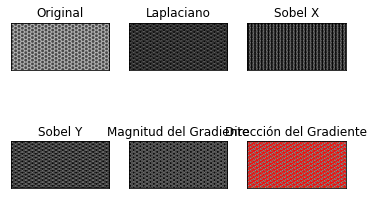

In [2]:
# malla
graph_gradients("metalgrid.jpg")